<a href="https://colab.research.google.com/github/alvisjohnmark/Earthquake-frequency-viusalization/blob/main/Earthquake_frequency_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# google resource initialization
url = 'https://drive.google.com/file/d/11Pxq8TTWJmA19A1qY56sAgy4IyPJO1hx/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

# read the dataset
dataset = pd.read_csv(dwn_url)
dataset

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,NaN,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",NaN,NaN
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,NaN,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,NaN
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,NaN,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",NaN,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,NaN,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",NaN,NaN


In [ ]:
!pip install basemap

#1 Which continent and country most recorded earthquakes from 2001-2023
#2 Country with the highest magnitude
#3 The connection between magnitude and intensity
#4 Is there any patterns of the cycle from 2001-2023 (top 5)
#5 Is there any pattern based on country and continent

# 1  Which continent and country most recorded earthquakes from 2001-2023

In [ ]:
subset1 = dataset[dataset['country'].notnull()]
countryEQ = pd.DataFrame({'country': subset1['country'].value_counts().index, 'earthquakes': subset1['country'].value_counts().values})
topcountry = countryEQ.head(10)

In [ ]:
subset2 = dataset[dataset['continent'].notnull()]
continentEQ = pd.DataFrame({'continent': subset2['continent'].value_counts().index, 'earthquakes': subset2['continent'].value_counts().values})

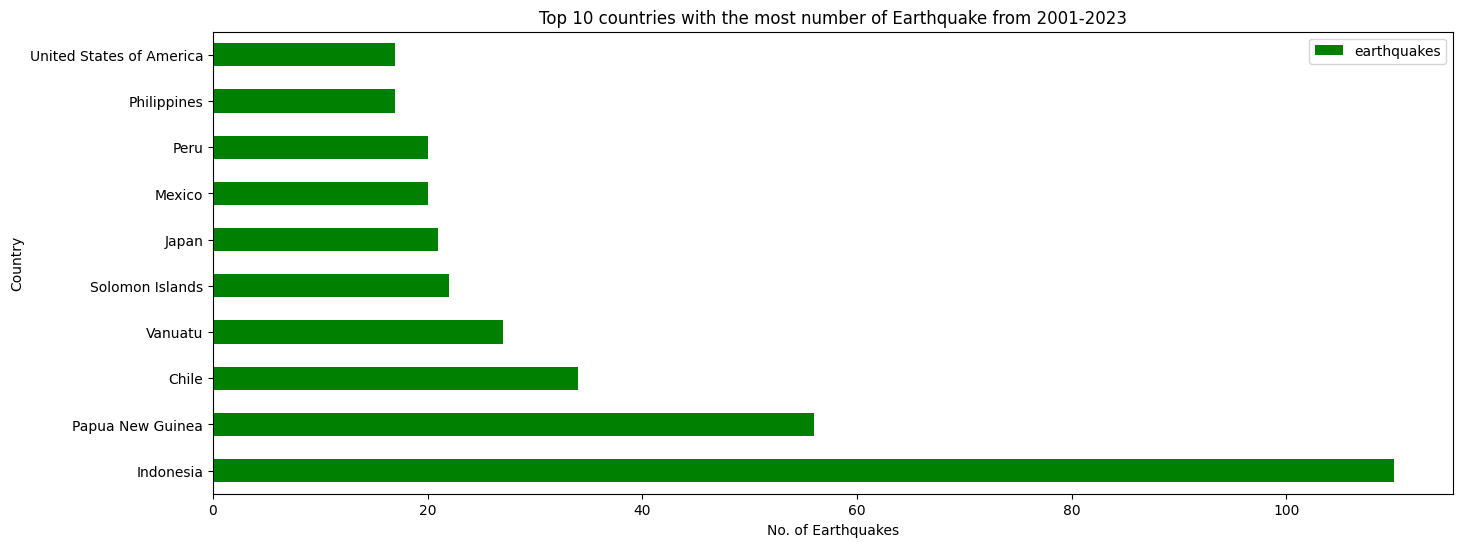

In [ ]:
topcountry.plot.barh(x='country', y='earthquakes',figsize=(16,6), color="green")
plt.xlabel("No. of Earthquakes")
plt.ylabel("Country")
plt.title("Top 10 countries with the most number of Earthquake from 2001-2023");

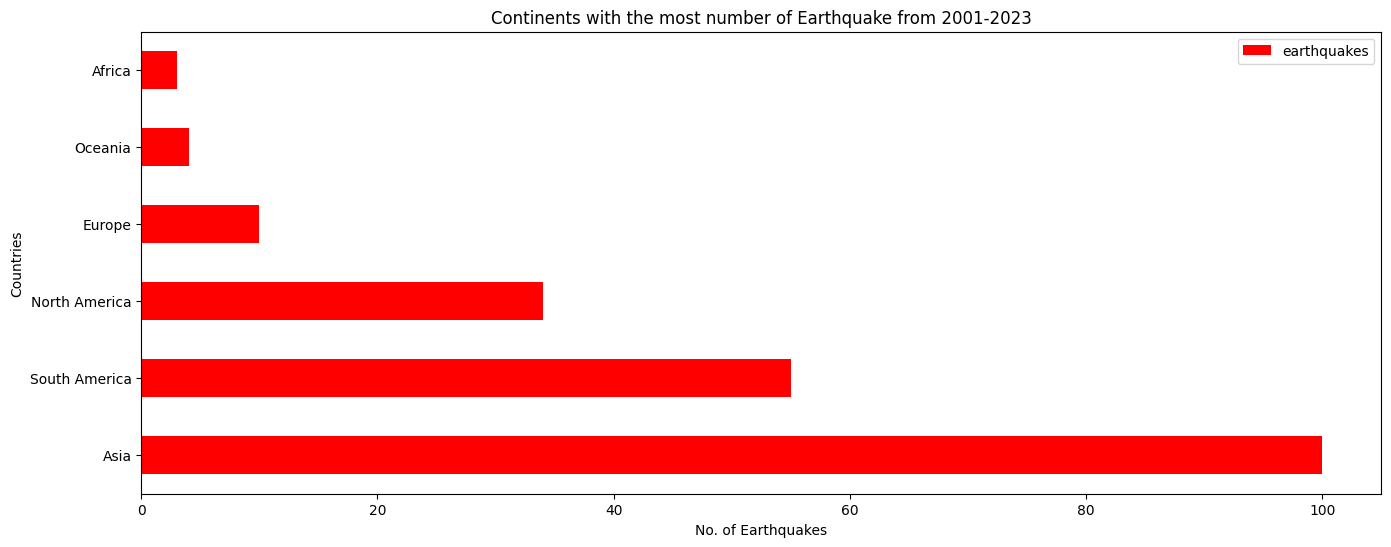

In [ ]:
continentEQ.plot.barh(x='continent', y='earthquakes',figsize=(16,6), color="red")
plt.xlabel("No. of Earthquakes")
plt.ylabel("Countries")
plt.title("Continents with the most number of Earthquake from 2001-2023");

#2

<Axes: ylabel='title'>

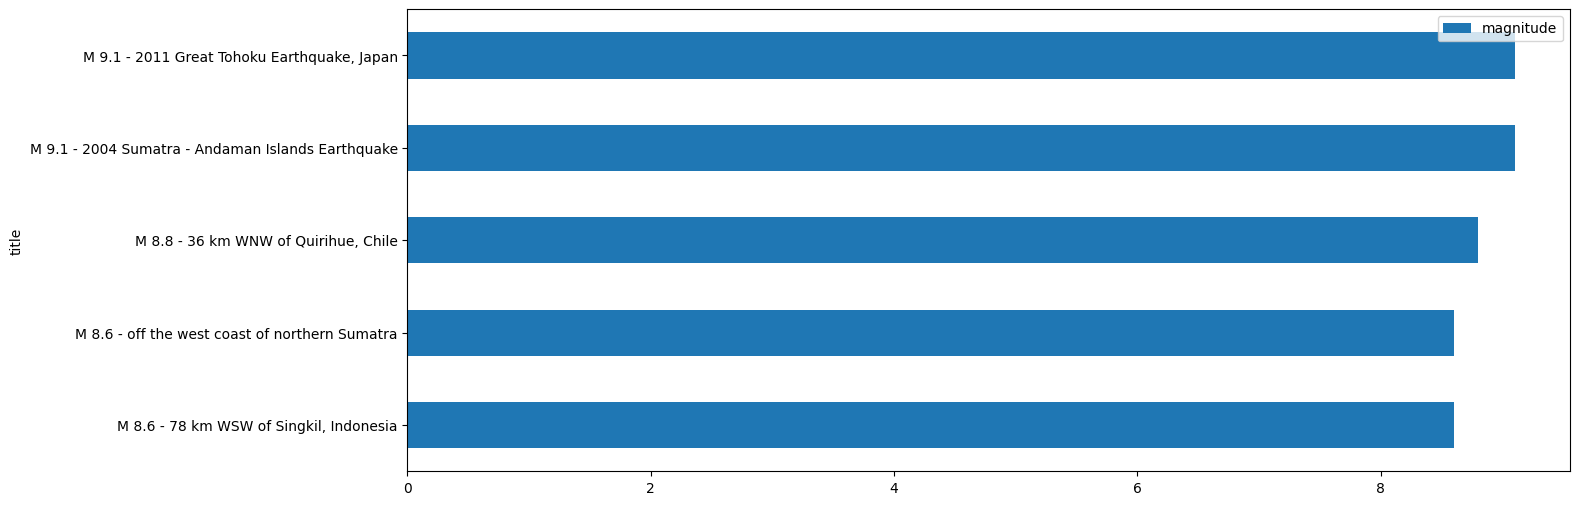

In [ ]:
highestmag = pd.DataFrame(dataset.groupby('title')['magnitude'].max())
highestmag.tail(5).plot.barh(figsize=(15,6))

#3

Text(0.5, 0, 'Community Decimal Intensity')

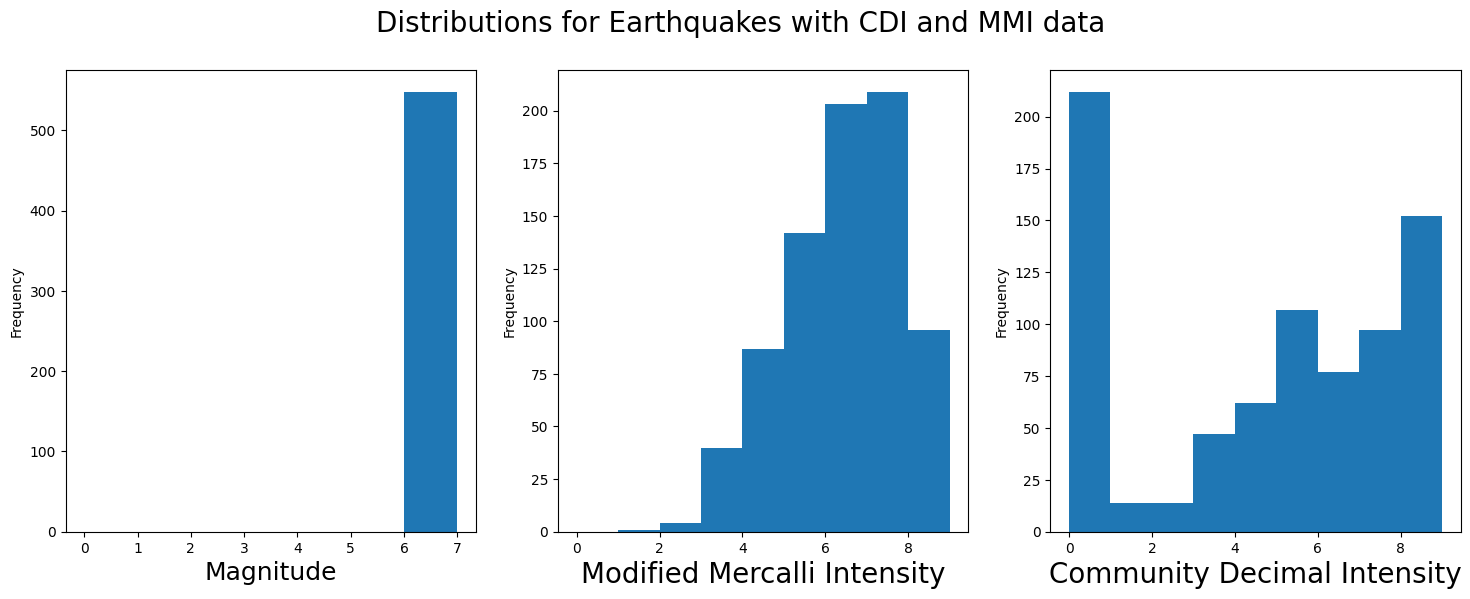

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(18,6))
fig.suptitle("Distributions for Earthquakes with CDI and MMI data", fontsize=20)

dataset['magnitude'].plot(kind='hist', bins=7, range=(0,7), ax=axs[0])
dataset['mmi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[1])
dataset['cdi'].plot(kind='hist', bins=9, range=(0,9), ax=axs[2])
axs[0].set_xlabel('Magnitude', fontsize=18)
axs[1].set_xlabel('Modified Mercalli Intensity', fontsize=20)
axs[2].set_xlabel('Community Decimal Intensity', fontsize=20)

#4

In [ ]:
dmy =  dataset[['day', 'month', 'year']] = dataset['date_time'].str.split(pat='-', expand=True)
year =  dataset[['year', 'time']] = dataset['year'].str.split(pat=' ', expand=True)

In [ ]:
yearpattern = pd.DataFrame({'year': dataset['year'].value_counts().sort_index().index,'No. of earthquakes': dataset['year'].value_counts().sort_index().values})
monthpattern = pd.DataFrame({'month': dataset['month'].value_counts().sort_index().index,'No. of earthquakes': dataset['month'].value_counts().sort_index().values})

Text(0.5, 1.0, 'Earthquake pattern per month from 2001-2022')

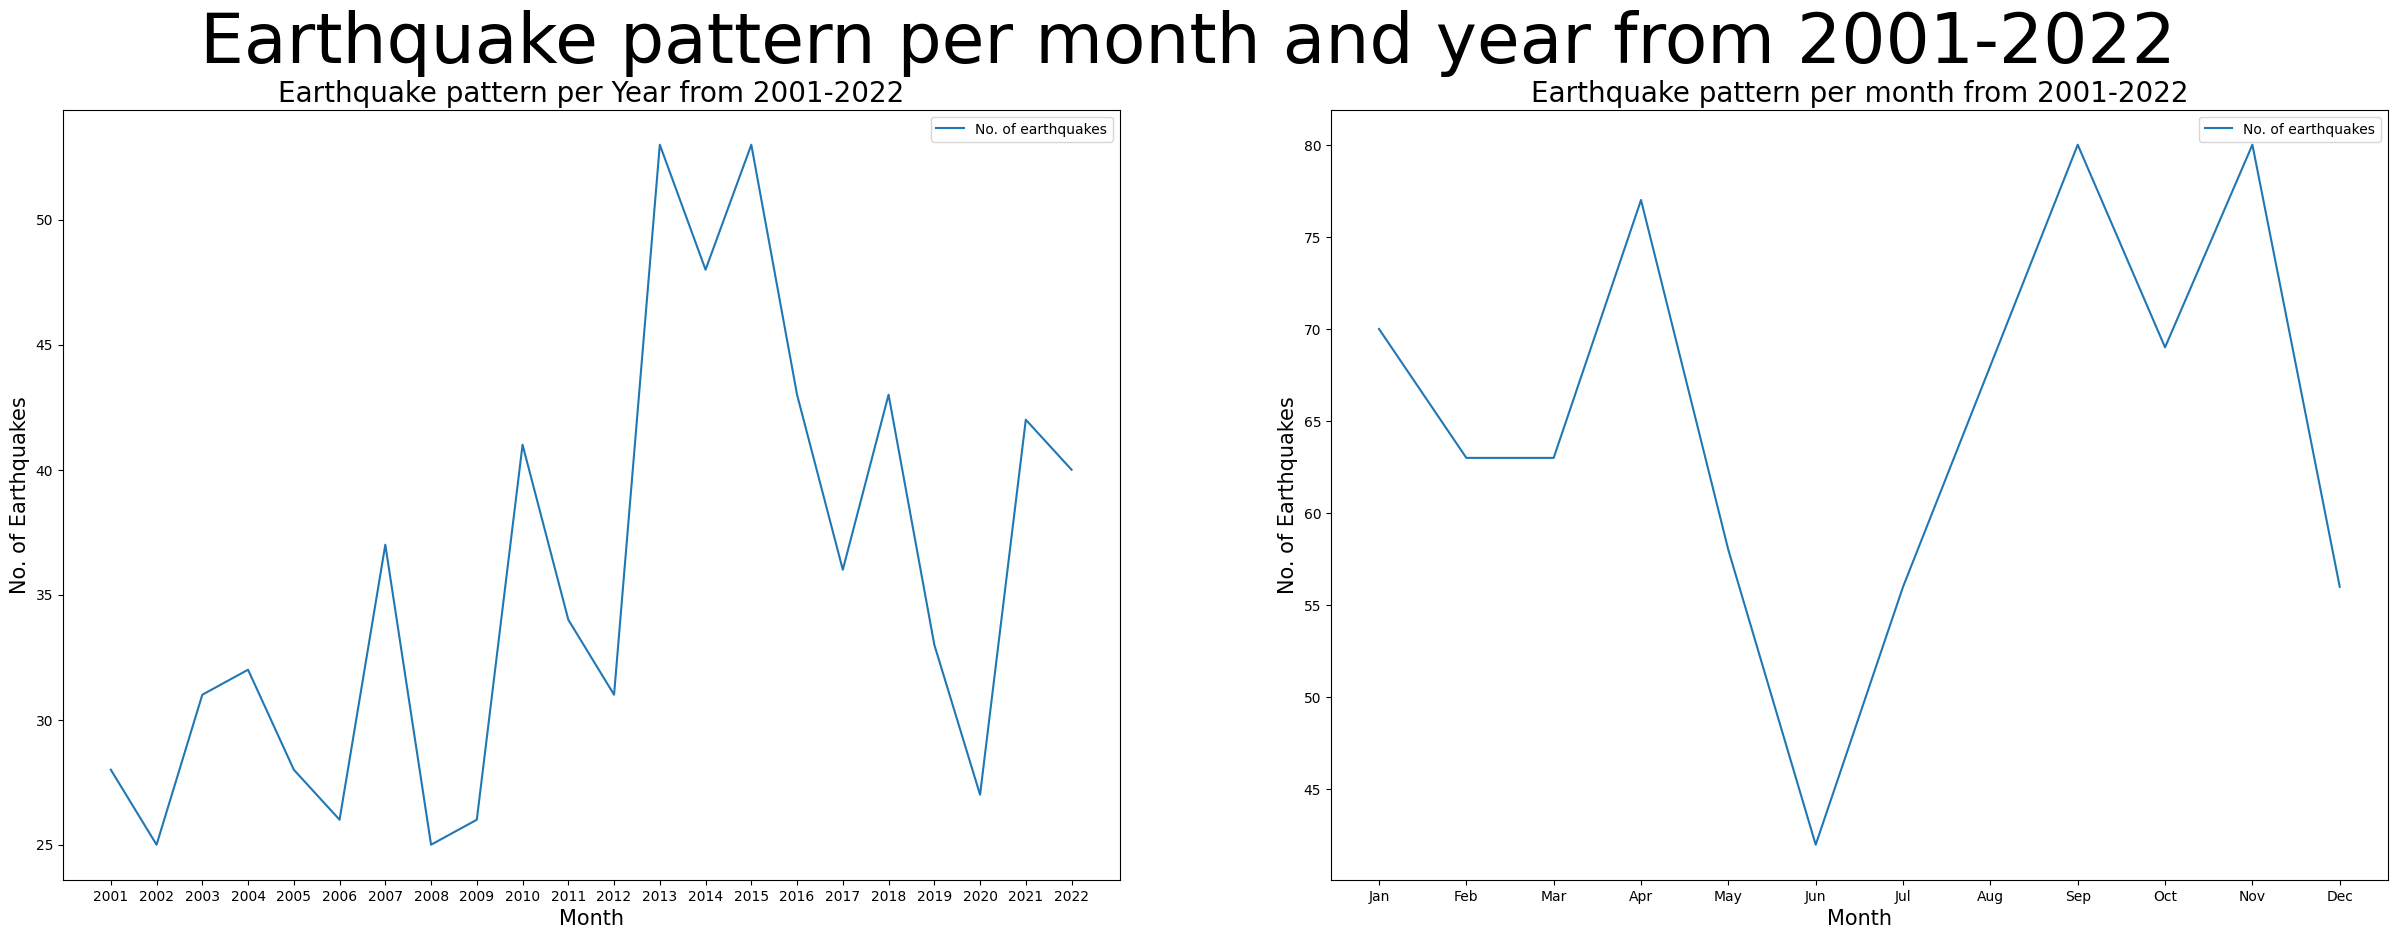

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(30,10))
fig.suptitle("Earthquake pattern per month and year from 2001-2022", fontsize=50)

yearpattern.plot(ax=axs[0])
monthpattern.plot(ax=axs[1])

axs[0].set_xlabel('No. of Earthquakes', fontsize=25)
axs[1].set_xlabel('No. of Earthquakes', fontsize=25)

plt.sca(axs[0])
tickvalues = yearpattern.index
labellist = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.xticks(ticks = tickvalues ,labels = labellist)
plt.xlabel("Month", fontsize=15)
plt.ylabel("No. of Earthquakes", fontsize=15)
plt.title("Earthquake pattern per Year from 2001-2022", fontsize=20)

plt.sca(axs[1])
tickvalues = monthpattern.index
labellist = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
plt.xticks(ticks = tickvalues ,labels = labellist)
plt.xlabel("Month", fontsize=15)
plt.ylabel("No. of Earthquakes", fontsize=15)
plt.title("Earthquake pattern per month from 2001-2022", fontsize=20)

#5

In [ ]:
indonesia = dataset.loc[dataset["country"] == "Indonesia"]
asia = dataset.loc[dataset["continent"] == "Asia"]
indopattern = pd.DataFrame({'year': indonesia['year'].value_counts().sort_index().index,'No. of earthquakes': indonesia['year'].value_counts().sort_index().values})
asiapattern = pd.DataFrame({'year': asia['year'].value_counts().sort_index().index,'No. of earthquakes': asia['year'].value_counts().sort_index().values})

Text(0.5, 1.0, 'Asia Earthquake pattern per month from 2001-2022')

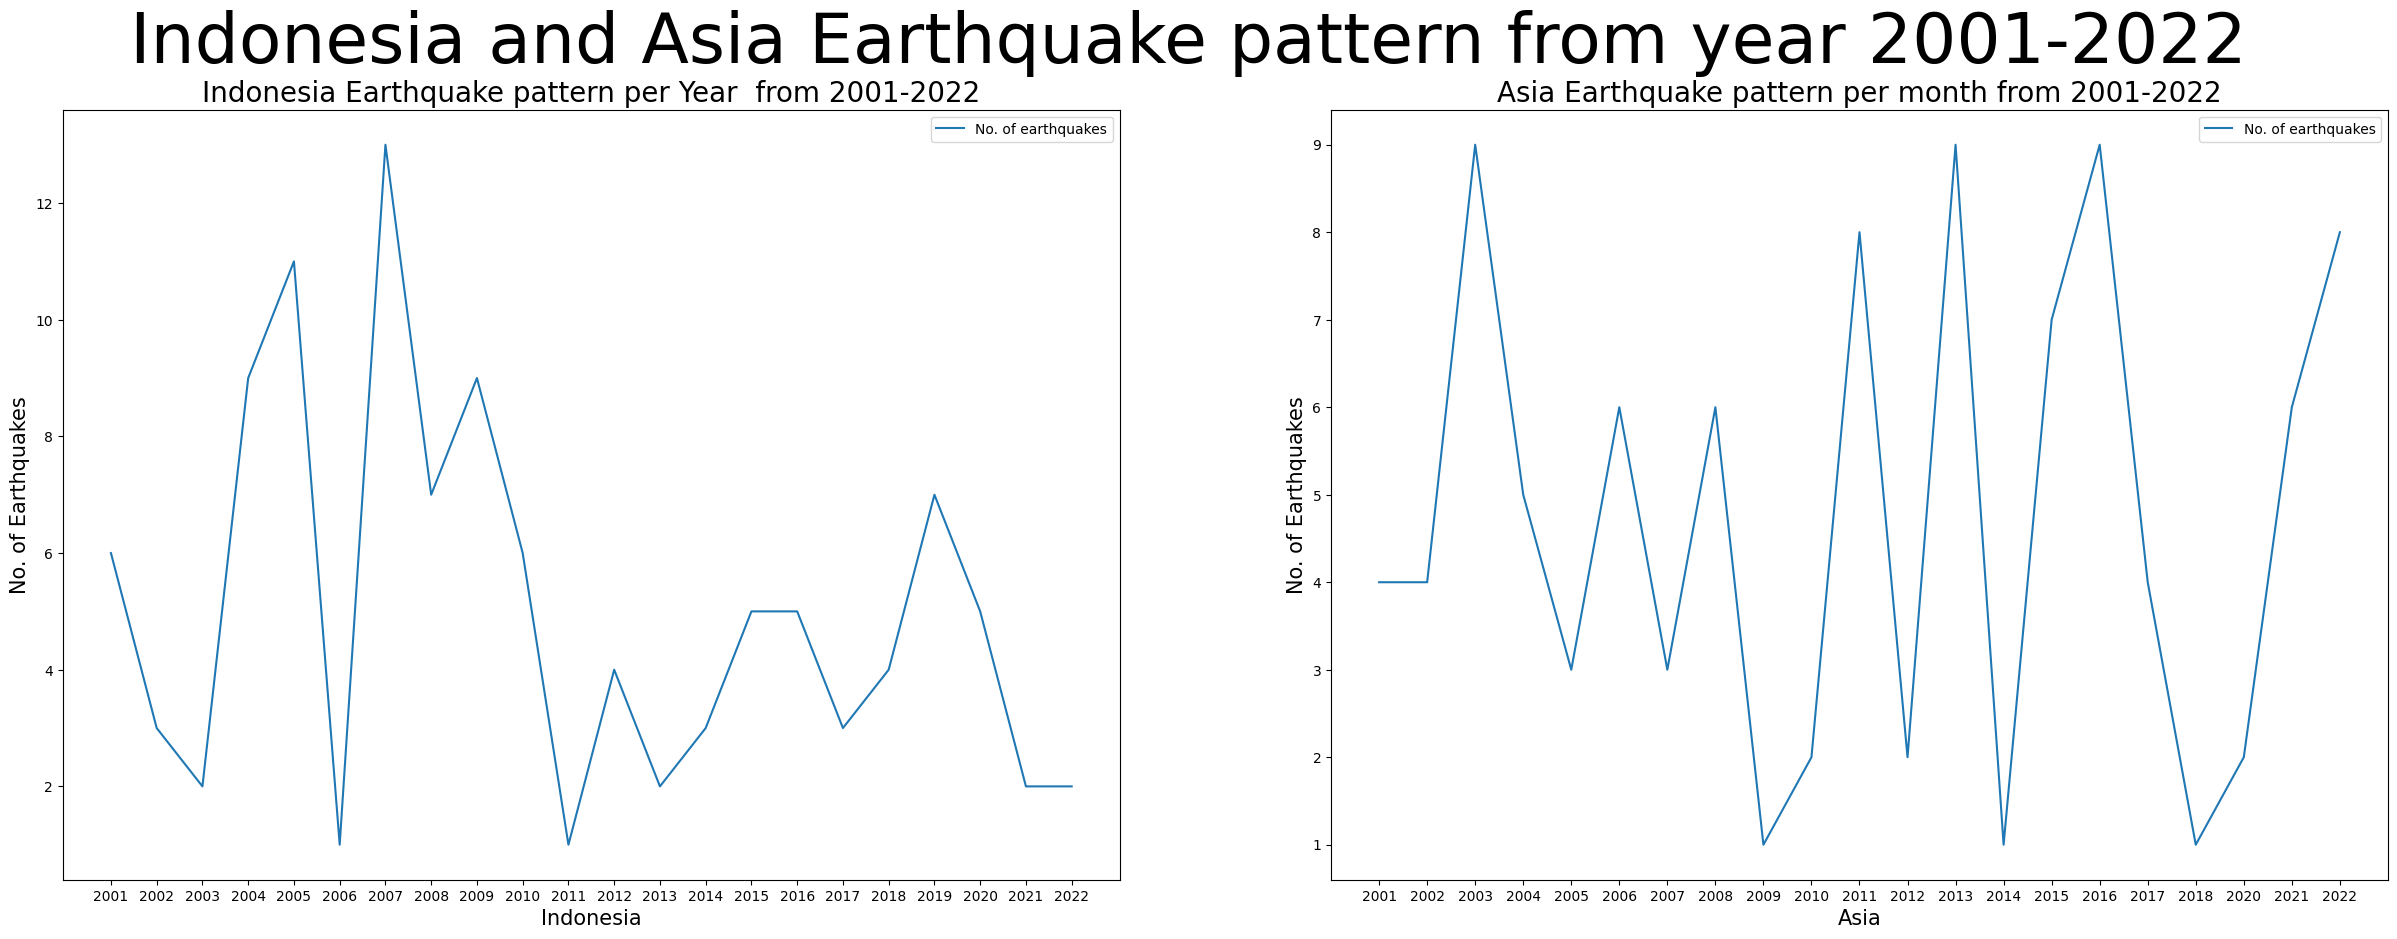

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(30,10))
fig.suptitle("Indonesia and Asia Earthquake pattern from year 2001-2022", fontsize=50)

indopattern.plot(ax=axs[0])
asiapattern.plot(ax=axs[1])

axs[0].set_xlabel('No. of Earthquakes', fontsize=25)
axs[1].set_xlabel('No. of Earthquakes', fontsize=25)

plt.sca(axs[0])
tickvalues = indopattern.index
labellist = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
plt.xticks(ticks = tickvalues ,labels = labellist)
plt.xlabel("Indonesia", fontsize=15)
plt.ylabel("No. of Earthquakes", fontsize=15)
plt.title("Indonesia Earthquake pattern per Year  from 2001-2022", fontsize=20)

plt.sca(axs[1])
tickvalues = asiapattern.index
labellist = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2020', '2021', '2022']
plt.xticks(ticks = tickvalues ,labels = labellist)
plt.xlabel("Asia", fontsize=15)
plt.ylabel("No. of Earthquakes", fontsize=15)
plt.title("Asia Earthquake pattern per month from 2001-2022", fontsize=20)

#MAP

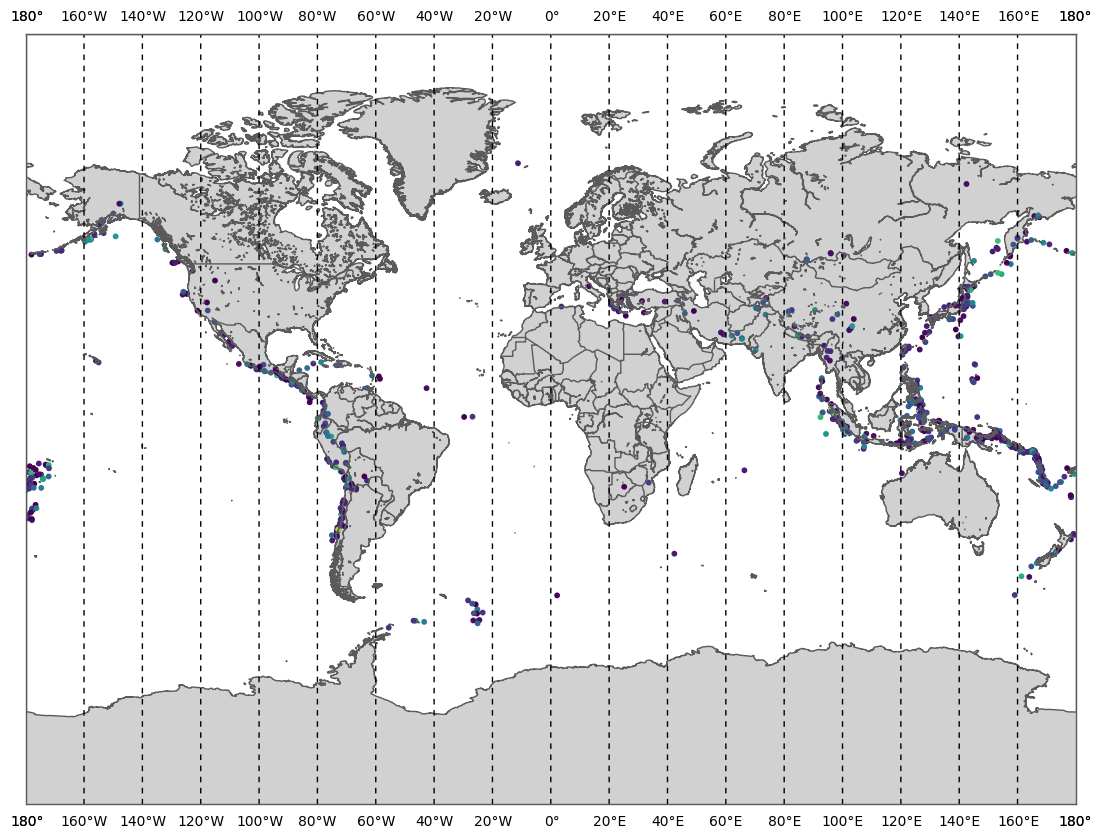

In [ ]:
plt.figure(figsize=(30,10))
line_color = '#5A5A5A'

map = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'i')
map.drawcoastlines(linewidth=1.0, linestyle='solid', color=line_color)
map.drawcountries(linewidth=1.0, linestyle='solid', color=line_color)
map.fillcontinents(alpha=0.9)
map.drawmapboundary(color=line_color)
map.drawmeridians(range(0, 360, 20), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 1, 1])

lat = dataset['latitude'].tolist()
lon = dataset['longitude'].tolist()
hue = dataset['magnitude'].tolist()

map.scatter(lon, lat, latlon = True, s = 10, c = hue, marker = 'o', alpha = 1)

plt.show()

# Earthquake locations mapped using latitude and longitude